# Лабораторная работа №3. Яровенко Максим ИУ5Ц-82Б.

# Подготовка данных

In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# https://scikit-learn.org/stable/datasets/index.html#iris-dataset
iris = load_iris()

In [3]:
# Наименования признаков
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# Значения признаков
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
type(iris.data)

numpy.ndarray

In [6]:
# Значения целевого признака
np.unique(iris.target)

array([0, 1, 2])

In [7]:
# Наименования значений целевого признака
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
list(zip(np.unique(iris.target), iris.target_names))

[(0, 'setosa'), (1, 'versicolor'), (2, 'virginica')]

In [9]:
# Значения целевого признака
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# Размер выборки
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [11]:
# Сформируем DataFrame
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [12]:
# И выведем его статистические характеристики
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Разделение выборки на обучающую и тестовую

In [13]:
# Как правило, параметр test_size устанавливают в 20% или 30%. 
# Здесь используется test_size=0.5 (50%) чтобы искусственно "ухудшить" 
# результат на хорошем наборе данных и показать различные возможности 
# использования метрик качества.
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(
    iris.data, iris.target, test_size=0.5, random_state=1)

In [14]:
# Размер обучающей выборки
iris_X_train.shape, iris_y_train.shape

((75, 4), (75,))

In [15]:
# Размер тестовой выборки
iris_X_test.shape, iris_y_test.shape

((75, 4), (75,))

Функция train_test_split разделила исходную выборку таким образом, чтобы в обучающей и тестовой частях сохранились все классы.

In [16]:
np.unique(iris_y_train)

array([0, 1, 2])

In [17]:
np.unique(iris_y_test)

array([0, 1, 2])

### Построим базовые модели на основе метода ближайших соседей

In [18]:
# 2 ближайших соседа
cl1_1 = KNeighborsClassifier(n_neighbors=2)
cl1_1.fit(iris_X_train, iris_y_train)
target1_1 = cl1_1.predict(iris_X_test)
len(target1_1), target1_1

(75,
 array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
        1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 2,
        0, 1, 2, 1, 1, 2, 1, 0, 1]))

In [19]:
# 10 ближайших соседей
cl1_2 = KNeighborsClassifier(n_neighbors=10)
cl1_2.fit(iris_X_train, iris_y_train)
target1_2 = cl1_2.predict(iris_X_test)
len(target1_2), target1_2

(75,
 array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
        1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2,
        0, 2, 2, 1, 1, 2, 2, 0, 1]))

# Метрики качества классификации

## Accuracy

Метрика вычисляет процент (долю в диапазоне от 0 до 1) правильно определенных классов.

In [20]:
# iris_y_test - эталонное значение классов из исходной (тестовой) выборки
# target* - предсказанное значение классов

# 2 ближайших соседа
accuracy_score(iris_y_test, target1_1)

0.92

In [21]:
# 10 ближайших соседей
accuracy_score(iris_y_test, target1_2)

0.9733333333333334

In [22]:
# Функция для вычисления метрики accuracy для каждого класса
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    classes = np.unique(y_true)
    res = dict()
    for c in classes:
        temp_data_flt = df[df['t']==c]
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        res[c] = temp_acc
    return res
def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [23]:
# 2 ближайших соседа
print_accuracy_score_for_classes(iris_y_test, target1_1)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 0.7777777777777778


In [24]:
# 10 ближайших соседей
print_accuracy_score_for_classes(iris_y_test, target1_2)

Метка 	 Accuracy
0 	 1.0
1 	 0.9583333333333334
2 	 0.9629629629629629


In [25]:
# Матрица ошибок или Confusion Matrix
confusion_matrix(iris_y_test, target1_1, labels=[0, 1, 2])

array([[24,  0,  0],
       [ 0, 24,  0],
       [ 0,  6, 21]], dtype=int64)

C:\Users\Truma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


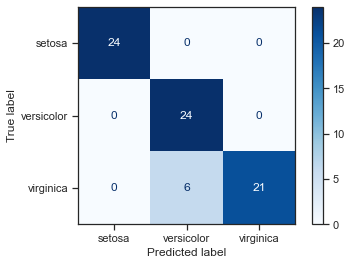

In [26]:
plot_confusion_matrix(cl1_1, iris_X_test, iris_y_test, 
                      display_labels=iris.target_names, cmap=plt.cm.Blues)

C:\Users\Truma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


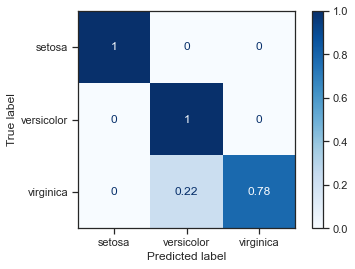

In [27]:
plot_confusion_matrix(cl1_1, iris_X_test, iris_y_test, 
                      display_labels=iris.target_names, 
                      cmap=plt.cm.Blues, normalize='true')

C:\Users\Truma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Truma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


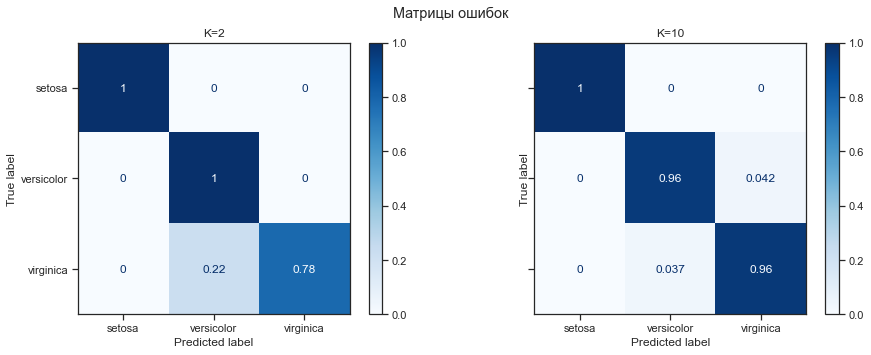

In [28]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,5))

plot_confusion_matrix(cl1_1, iris_X_test, iris_y_test, 
                      display_labels=iris.target_names, 
                      cmap=plt.cm.Blues, normalize='true', ax=ax[0])

plot_confusion_matrix(cl1_2, iris_X_test, iris_y_test, 
                      display_labels=iris.target_names, 
                      cmap=plt.cm.Blues, normalize='true', ax=ax[1])

fig.suptitle('Матрицы ошибок')
ax[0].title.set_text('K=2')
ax[1].title.set_text('K=10')

## Precision и F-мера

### Precision

In [29]:
# Параметры TP, TN, FP, FN считаются как сумма по всем классам
precision_score(iris_y_test, target1_1, average='micro')

0.92

In [30]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется среднее значение, дисбаланс классов не учитывается.
precision_score(iris_y_test, target1_1, average='macro')


0.9333333333333332

In [31]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется средневзвешенное значение, дисбаланс классов учитывается 
# в виде веса классов (вес - количество истинных значений каждого класса).
precision_score(iris_y_test, target1_1, average='weighted')

0.936

### F-мера

In [32]:
f1_score(iris_y_test, target1_1, average='micro')

0.92

In [33]:
f1_score(iris_y_test, target1_1, average='macro')

0.9212962962962963

In [34]:
f1_score(iris_y_test, target1_1, average='weighted')

0.9194444444444446

Функция classification_report позволяет выводить значения точности, полноты и F-меры для всех классов выборки.

In [35]:
classification_report(iris_y_test, target1_1, 
                      target_names=iris.target_names, output_dict=True)

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24},
 'versicolor': {'precision': 0.8,
  'recall': 1.0,
  'f1-score': 0.888888888888889,
  'support': 24},
 'virginica': {'precision': 1.0,
  'recall': 0.7777777777777778,
  'f1-score': 0.8750000000000001,
  'support': 27},
 'accuracy': 0.92,
 'macro avg': {'precision': 0.9333333333333332,
  'recall': 0.9259259259259259,
  'f1-score': 0.9212962962962963,
  'support': 75},
 'weighted avg': {'precision': 0.936,
  'recall': 0.92,
  'f1-score': 0.9194444444444446,
  'support': 75}}

## Оптимизация гиперпараметров

### Grid Search (решетчатый поиск)

In [36]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [37]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(iris_X_train, iris_y_train)

CPU times: total: 78.1 ms
Wall time: 77.8 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             scoring='accuracy')

In [38]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00039859, 0.00039902, 0.00059843, 0.00059848, 0.00039892,
        0.00039897, 0.00039883, 0.00039892, 0.00039883, 0.00019927]),
 'std_fit_time': array([0.00048817, 0.00048869, 0.00048862, 0.00048866, 0.00048858,
        0.00048864, 0.00048846, 0.00048858, 0.00048846, 0.00039854]),
 'mean_score_time': array([0.0009975 , 0.0007978 , 0.00099721, 0.0009973 , 0.0009973 ,
        0.00059829, 0.00079789, 0.00099745, 0.00059838, 0.00099759]),
 'std_score_time': array([1.78416128e-07, 3.98898363e-04, 4.67203091e-07, 1.50789149e-07,
        2.61174468e-07, 4.88499866e-04, 3.98945848e-04, 2.43140197e-07,
        4.88577702e-04, 4.10190833e-07]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_ne

In [39]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier()

In [40]:
# Лучшее значение метрики
clf_gs.best_score_

0.9733333333333334

In [41]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 5}

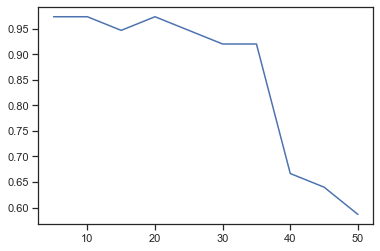

In [42]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

### Randomized Search (случайный поиск)

Используется в том случае когда полный решетчатый поиск работает слишком долго.

In [43]:
%%time
clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_rs.fit(iris_X_train, iris_y_train)

CPU times: total: 78.1 ms
Wall time: 74.8 ms


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
                   scoring='accuracy')

In [44]:
# В данном случае оба способа нашли одинаковое решение
clf_rs.best_score_, clf_rs.best_params_

(0.9733333333333334, {'n_neighbors': 5})

In [45]:
clf_gs.best_score_, clf_gs.best_params_

(0.9733333333333334, {'n_neighbors': 5})

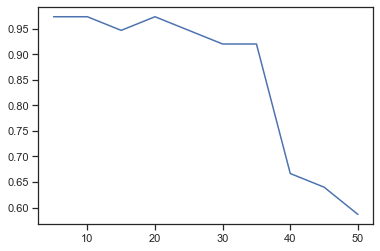

In [46]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_rs.cv_results_['mean_test_score'])

## Построение кривых обучения и валидации

### Построение кривых обучения - learning_curve

Строится зависимость метрики на обучающей выборке от размера выборки.

In [47]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Truma\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

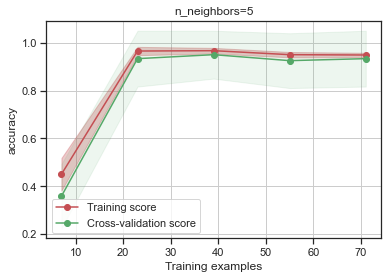

In [48]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=5), 'n_neighbors=5', 
                    iris_X_train, iris_y_train, cv=20)

<module 'matplotlib.pyplot' from 'C:\\Users\\Truma\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

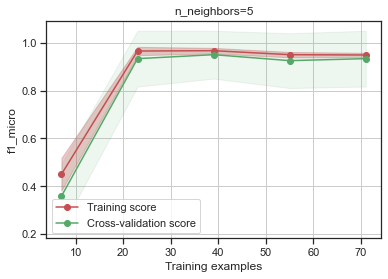

In [49]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=5), 'n_neighbors=5', 
                    iris_X_train, iris_y_train, cv=20, scoring='f1_micro')

<module 'matplotlib.pyplot' from 'C:\\Users\\Truma\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

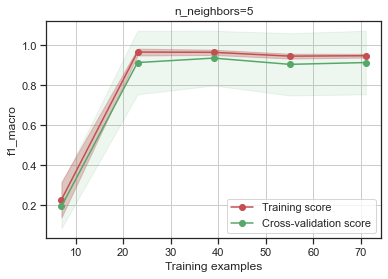

In [50]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=5), 'n_neighbors=5', 
                    iris_X_train, iris_y_train, cv=20, scoring='f1_macro')

## Построение кривой валидации - validation_curve

Строится зависимость метрики на тестовой выборке от одного из гиперпараметров.

In [51]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring='accuracy'):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Truma\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

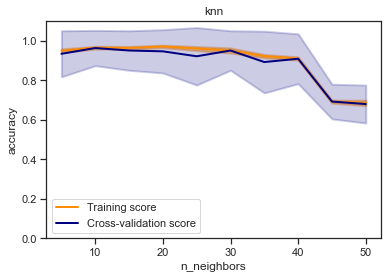

In [52]:
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      iris_X_train, iris_y_train, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=20, scoring="accuracy")